# Hands-on exercises

## 1. Let's fit two linear models, one for classification and one for regression.

1. Breast cancer wisconsin dataset  (classification). https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer 

`from sklearn.datasets import load_breast_cancer
X_bc, y_bc = load_breast_cancer(return_X_y=True)`


2. California housing dataset (regression) https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

`from sklearn.datasets import fetch_california_housing
X_cal, y_cal = fetch_california_housing(return_X_y=True)`


## Tasks

* Use train_test_split to create two subsets of data, one for fitting the model and the other for testing the model (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) hint:
`from sklearn.model_selection import train_test_split`

* Fit one model for each dataset. test two different values of parameters apart of the parameter by default. Check the score on the test set. hint: `from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression`

* Hint: use ? e.g. `LogisticRegression?`

## 2. Let's fit two models one tree based and one SVC.

Use the wine dataset from scikit-learn. Similar to the previous hands-on exercises, split the data and run using different parameters to obtain the best score on the test set (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

`from sklearn.datasets import load_wine
X_w , y_w = load_wine(return_X_y=True)`


# Solution

In [86]:
# 1. Let's fit two linear models, one for classification and one for regression.

# Step 1: importing required libraries

!pip install mglearn
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

#plt.rcParams.keys()

In [87]:
# step 2: loading requied breast_cancer datasset

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge

X_bc, y_bc = load_breast_cancer(return_X_y=True) # load the data

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, random_state=42)

# Step 3: logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

logreg100 = LogisticRegression(C=100,max_iter=1000,solver='liblinear').fit(X_train_bc, y_train_bc)
print("Training set score: {:.3f}".format(logreg100.score(X_train_bc, y_train_bc)))
print("Test set score: {:.3f}".format(logreg100.score(X_test_bc, y_test_bc)))

Training set score: 0.974
Test set score: 0.958


In [88]:
# Step 4: logreg = LogisticRegression cahnging parameters

logreg100 = LogisticRegression(C=0.01,max_iter=1000,solver='liblinear').fit(X_train_bc, y_train_bc)
print("Training set score: {:.3f}".format(logreg100.score(X_train_bc, y_train_bc)))
print("Test set score: {:.3f}".format(logreg100.score(X_test_bc, y_test_bc)))

Training set score: 0.925
Test set score: 0.958


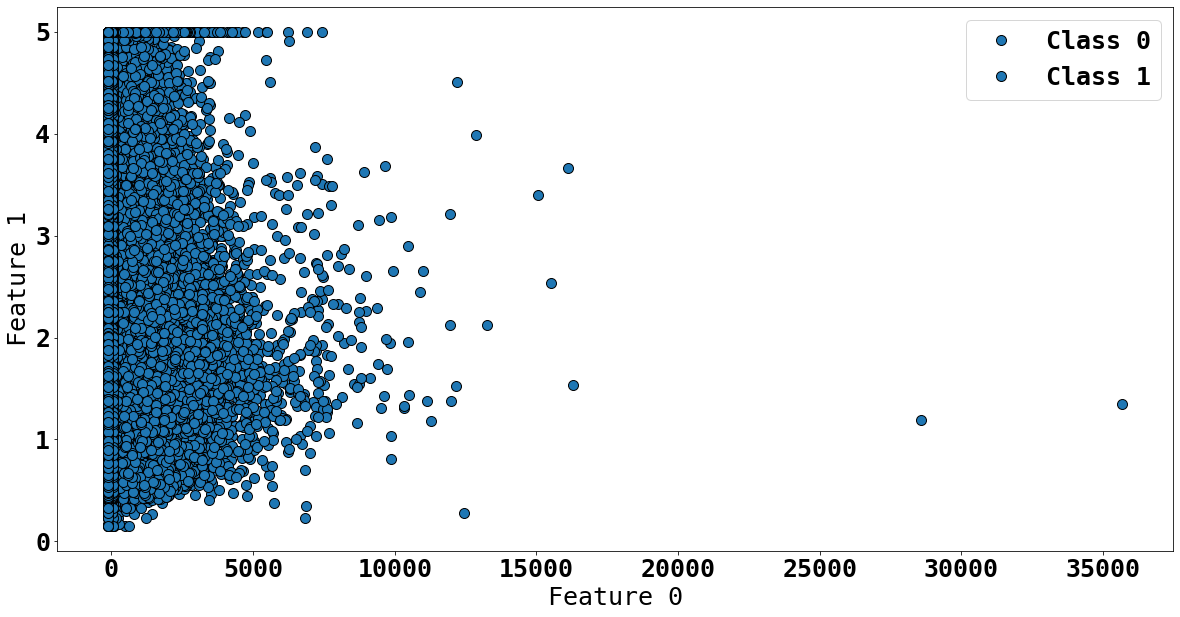

In [89]:
# step 5: loading requied california_housing datasset

from sklearn.datasets import fetch_california_housing

X_cal, y_cal = fetch_california_housing(return_X_y=True) # load the data

mglearn.discrete_scatter(X_cal, y_cal)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1"])

In [94]:
## 2. Let's fit two models one tree based and one SVC.

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine

X_w , y_w = load_wine(return_X_y=True)

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def foooo(h =.02): # step size in the mesh

    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
             "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
             "Naive Bayes", "QDA"]

    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        GaussianProcessClassifier(1.0 * RBF(1.0)),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        MLPClassifier(alpha=1,max_iter=10000),
        AdaBoostClassifier(),
        GaussianNB(),
        QuadraticDiscriminantAnalysis()]

    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                               random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(noise=0.3, random_state=0),
                make_circles(noise=0.2, factor=0.5, random_state=1),
                linearly_separable
                ]

    figure = plt.figure(figsize=(30, 12))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1

    plt.tight_layout()
    plt.show()


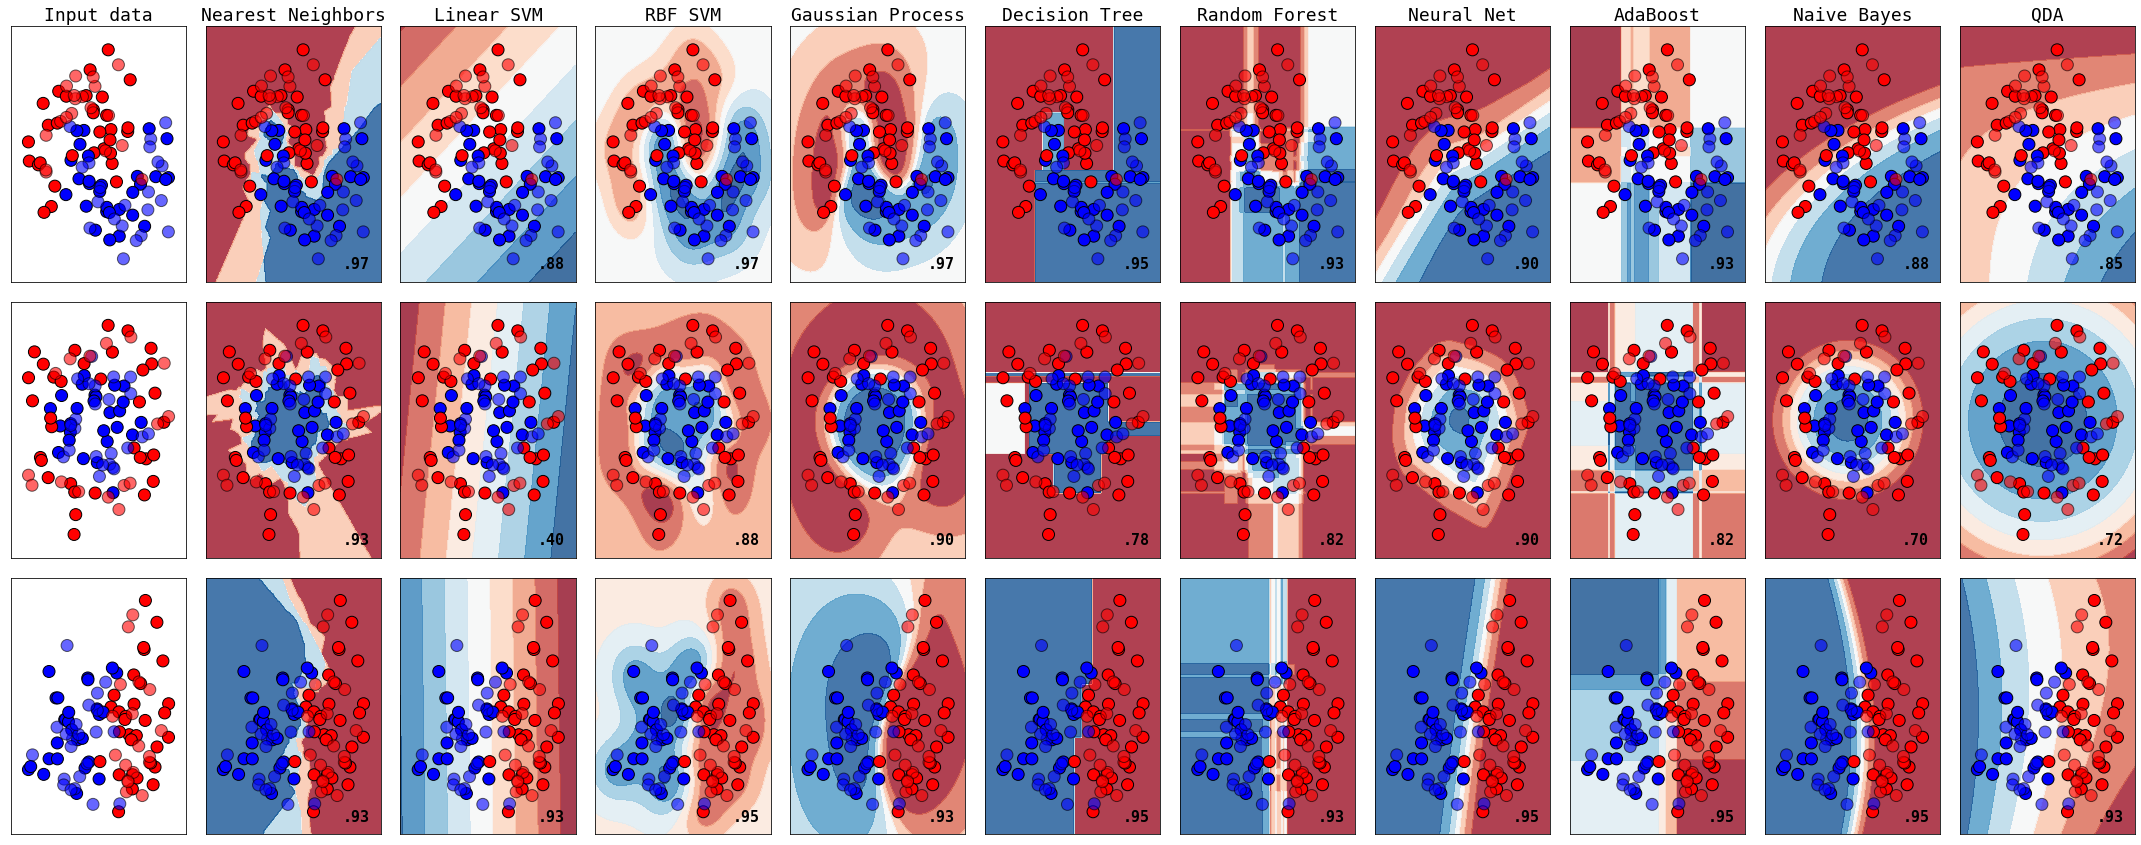

In [97]:
plt.rcParams['lines.markersize'] = 12.0
plt.rcParams.update({'font.size': 15})
foooo()